### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
#import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN","NAME"], axis = 1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
pd.Series({col: len(pd.unique(application_df[col])) for col in application_df})

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app = application_df['APPLICATION_TYPE'].value_counts()
app

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
#from sklearn.preprocessing import OneHotEncoder
# Instantiate OneHotEncoder
#ohe = OneHotEncoder()
#app = ohe.fit_transform(application_df.APPLICATION_TYPE.values.reshape(-1, 1)).toarray()
#app= pd.get_dummies(application_df, columns=['APPLICATION_TYPE'])
#app

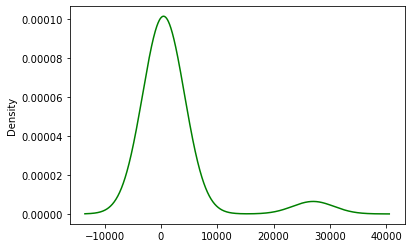

In [6]:
# Visualize the value counts of APPLICATION_TYPE
app.plot.density(color='green') 

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app[app < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification = application_df['CLASSIFICATION'].value_counts()
classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1248        1
C2600        1
C2380        1
C1370        1
C3700        1
Name: CLASSIFICATION, Length: 71, dtype: int64

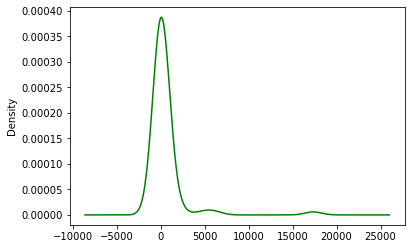

In [9]:
# Visualize the value counts of CLASSIFICATION
classification.plot.density(color='green') 

In [10]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification[classification < 1800].index)

# Replace in dataframe
for cls in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [16]:
import tensorflow as tf

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# define the checkpoint path 
os.makedirs("checkpoints/",exist_ok=True)

In [27]:
#Create a callback that saves the model's weights every 5 epochs.
#cb = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
   #                                  save_weights_only=True, period=5)
    
cb = tf.keras.callbacks.ModelCheckpoint(
    filepath="checkpoints/weights.{epoch:02d}.hdf5",
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model                                     
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cb])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 2/100
188/804 [======>.......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 3/100
369/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 4/100
565/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5301
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 5/100
765/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [=======

445/804 [===============>..............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 40/100
642/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 41/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 42/100
 27/804 [>.............................] - ETA: 1s - loss: 0.6875 - accuracy: 0.5590
Epoch 00042: saving model to checkpoints\weights.42.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 43/100
222/804 [=======>......................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5256
Epoch 00043: saving model to checkpoints\weights.43.hdf5
804/804 [===============

804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 77/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 78/100
 78/804 [=>............................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5276
Epoch 00078: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 79/100
269/804 [=========>....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 00079: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 80/100
465/804 [================>.............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 00080: saving model to checkpoints\weights.80.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 81/100
657/804 [=======================>......] - ETA: 0s - loss: 0.690

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6631 - accuracy: 0.6034
Loss: 0.6630890965461731, Accuracy: 0.6033819317817688


In [30]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")